<a href="https://colab.research.google.com/github/Mangalis0/regression_team_2/blob/master/faatimah_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# For Faatimah

# **`Sendy Explore competition `**

# Introduction

# Importing libraries

In [0]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
import plotly.express as px

# Importing dataset

In [0]:
train = pd.read_csv('/content/Train.csv') #training set
test = pd.read_csv('/content/Test.csv') #testing set(does not contain y variable)
riders = pd.read_csv('/content/Riders.csv') #riders info
variable_def = pd.read_csv('/content/VariableDefinitions.csv')
sample = pd.read_csv('/content/SampleSubmission.csv') #sample of competition submission, should have order no for testing set, and y predicted from model 

In [0]:
train.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745


Notes:



*   spaces in column names need to be removed 
*   to be dropped: order no, user id, vehicle type(it's only for 'Bike')
*   possible variables to be encoded: platform type, personal or business, placement, confirmation, lat and long coordinates, rider ID
*   pd.datetime for times 
*   distance to meters and possible log transformation 
*   transform time from pick-up to arrival
*   grouping of locations? to create categories
*   grouping of days? weekday vs weekend?
*   time- creating morning, afternoon, evening 
















In [0]:
test.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id
0,Order_No_19248,User_Id_3355,Bike,3,Business,27,3,4:44:10 PM,27,3,4:44:29 PM,27,3,4:53:04 PM,27,3,5:06:47 PM,8,NaN,NaN,-1.333275,36.870815,-1.305249,36.82239,Rider_Id_192


In [0]:
riders.head(1)

,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Rider_Id_396,2946,2298,14.0,1159


Notes: 
*   could be joined to train?
*   what's the units for age? update- probably in weeks 

*   can no of ratings be dropped? it is included in average rating





In [23]:
variable_def.head()

,Order No,Unique number identifying the order
0,User Id,Unique number identifying the customer on a pl...
1,Vehicle Type,"For this competition limited to bikes, however..."
2,Platform Type,"Platform used to place the order, there are 4 ..."
3,Personal or Business,Customer type
4,Placement - Day of Month,Placement - Day of Month i.e 1-31


In [0]:
sample.head(1)

,Order_No,Time from Pickup to Arrival
0,Order_No_19248,567.0


Train EDA

In [0]:
print('train contains')
print('No. of rows:', train.shape[0])
print('No. of columns:', train.shape[1])

train contains
No. of rows: 21201
No. of columns: 29


In [0]:
train.describe() #descriptive stats 

,Platform Type,Placement - Day of Month,Placement - Weekday (Mo = 1),Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Pickup - Day of Month,Pickup - Weekday (Mo = 1),Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Time from Pickup to Arrival
count,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000,16835.000000,552.000000,21201.000000,21201.000000,21201.000000,21201.000000,21201.000000
mean,2.752182,15.653696,3.240083,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,15.653837,3.240225,9.506533,23.258889,7.905797,-1.281470,36.811264,-1.282581,36.811220,1556.920947
std,0.625178,8.798916,1.567295,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,8.798886,1.567228,5.668963,3.615768,17.089971,0.030507,0.037473,0.034824,0.044721,987.270788
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.200000,0.100000,-1.438302,36.653621,-1.430298,36.606594,1.000000
25%,3.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,8.000000,2.000000,5.000000,20.600000,1.075000,-1.300921,36.784605,-1.301201,36.785661,882.000000
50%,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,15.000000,3.000000,8.000000,23.500000,2.900000,-1.279395,36.807040,-1.284382,36.808002,1369.000000
75%,3.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,23.000000,5.000000,13.000000,26.000000,4.900000,-1.257147,36.829741,-1.261177,36.829477,2040.000000
max,4.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,31.000000,7.000000,49.000000,32.100000,99.100000,-1.147170,36.991046,-1.030225,37.016779,7883.000000


For all the variables, mean and mode are similar, assume normality?

In [0]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [0]:
train.isnull().sum(axis = 0) #number of nulls per column 

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

In [0]:
#percentage of Nan values:
temp =round((train.isnull().sum(axis = 0)['Temperature']/21201)*100,2)
precip = round((train.isnull().sum(axis = 0)['Precipitation in millimeters']/21201)*100,2)
print(temp,'% of missing values in temp column')
print(precip,'% of missing values in precipitation column')

20.59 % of missing values in temp column
97.4 % of missing values in precipitation column


Notes: 
*   the Nans in temp will need to be imputed- either mean, mode, median 
*   precipitation should be dropped, over 90% of data is Nan



In [0]:
#understanding temp data
train.describe()['Temperature']

count    16835.000000
mean        23.258889
std          3.615768
min         11.200000
25%         20.600000
50%         23.500000
75%         26.000000
max         32.100000
Name: Temperature, dtype: float64

note: research temp data for Nairobi to see how it fits in 

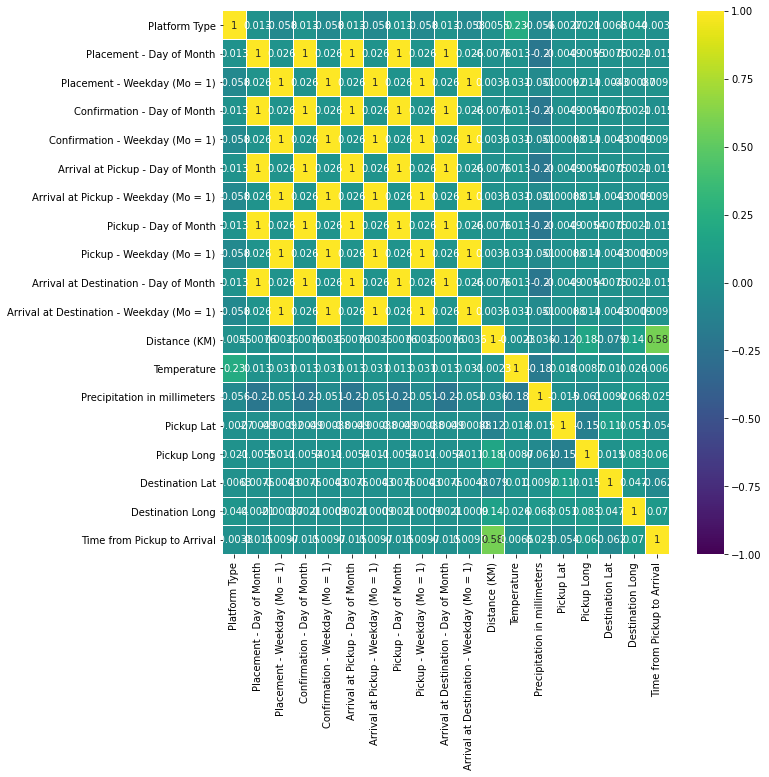

In [0]:
#plotting some prelim correlation maps for train 
train_kor = train.corr()
plt.figure(figsize=(10,10))
sns.heatmap(train_kor, vmin=-1, vmax=1, cmap='viridis', annot=True, linewidth=0.1)

needs interpretation

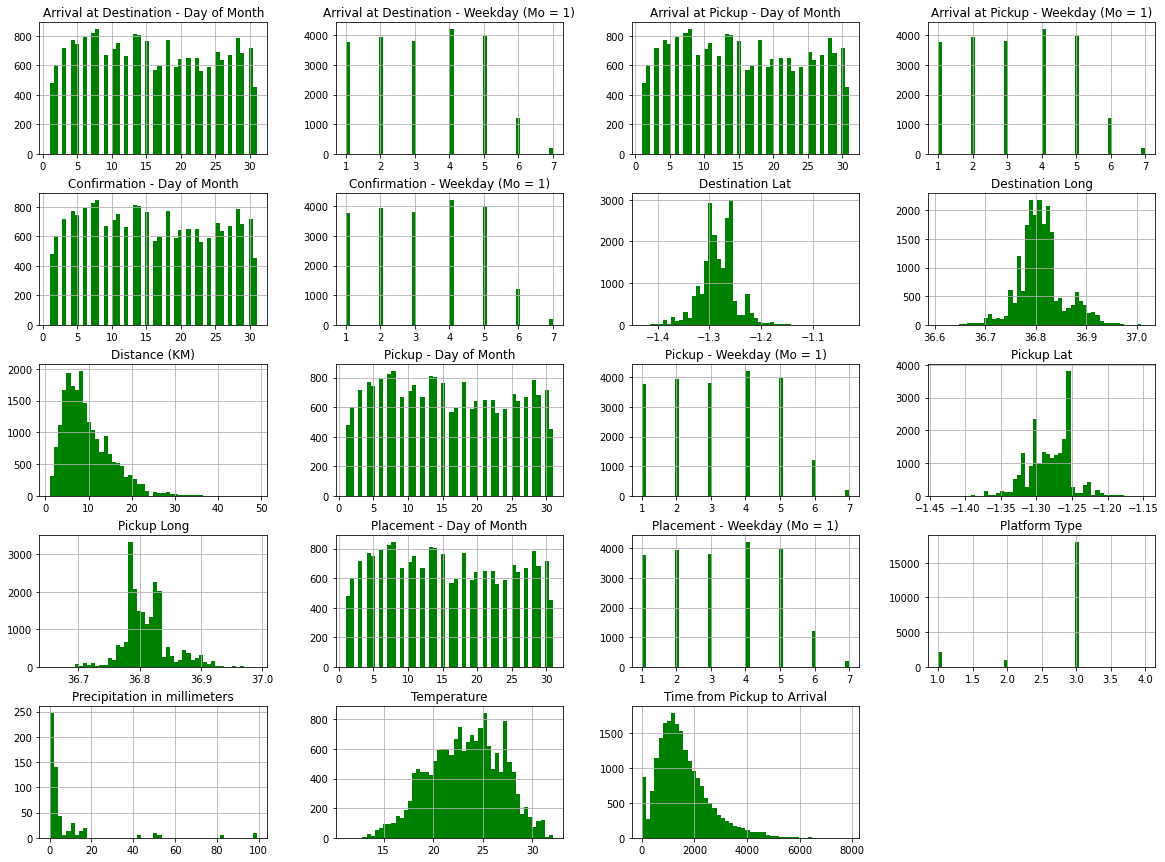

In [0]:
train.hist(bins=50, figsize=(20,15), color = 'green')
plt.show()

In [0]:
px.scatter_mapbox(train, 
                     lat='Pickup Lat', 
                     lon='Pickup Long',  
                     color = 'Time from Pickup to Arrival',
                     color_continuous_scale = 'algae', 
                     mapbox_style = 'open-street-map',
                     title = 'pick up location')

merge train and riders on rider ID

In [0]:
no_riders = train['Rider Id'].nunique()
print('There are', no_riders, 'different riders in the train dataset')

There are 924 different riders in the train dataset


In [0]:
no_riders_riders = riders['Rider Id'].nunique()
print('There are', no_riders_riders, 'different riders in the riders dataset')

There are 960 different riders in the riders dataset


there is 

In [11]:
new = pd.merge(train,riders, on = 'Rider Id' )# this still needs work 
new.head(1)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,745,1637,1309,13.8,549


Starting with the modeling 

In [0]:
#create a function for removing spaces in column name 
def col_names_without_spaces(df):
  df.columns = [col.replace(" ","_") for col in df.columns] 
  return df 


In [0]:
#functions for working with 'riders' 
def riders_df_func(df):
  df['Age'] = round(df['Age']/52,) # age is in weeks 
  df = df.drop(columns=['No_of_Ratings']) # there's a relationship, ave rating= rating/no of ratings
  return df 

In [0]:
#removing the y(response) variable
new_train = train.drop(train.columns[-1], axis=1) 

In [0]:
new_train = pd.merge(new_train,riders, on = "Rider Id" )


In [76]:
new_train.head()

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,25.0,13.8,549
1,Order_No_27440,User_Id_2642,Bike,3,Personal,18,5,3:41:17 PM,18,5,3:41:30 PM,18,5,4:07:16 PM,18,5,4:13:37 PM,18,5,5:01:43 PM,20,24.5,NaN,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,25.0,13.8,549
2,Order_No_14170,User_Id_3339,Bike,3,Business,31,5,12:51:41 PM,31,5,1:12:49 PM,31,5,1:20:02 PM,31,5,1:33:08 PM,31,5,2:16:43 PM,6,24.7,NaN,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,25.0,13.8,549
3,Order_No_21727,User_Id_3523,Bike,3,Personal,2,2,7:12:10 AM,2,2,7:12:29 AM,2,2,7:35:24 AM,2,2,7:38:46 AM,2,2,8:28:32 AM,18,15.2,NaN,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,25.0,13.8,549
4,Order_No_8301,User_Id_87,Bike,2,Personal,22,2,10:40:58 AM,22,2,10:42:24 AM,22,2,10:56:00 AM,22,2,10:59:40 AM,22,2,11:26:22 AM,7,19.2,NaN,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,25.0,13.8,549


In [69]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21201 entries, 0 to 21200
Data columns (total 36 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [0]:
### START FUNCTION
def cleaner(input_df, threshold, similarity_threshold):
    input_dfc = input_df.copy()
    
    x = 0 # this will count the number of columns dropped

    #######################################################################################################################
    # The Code below drops columns that have null values exceeding threshold and Columns that have ONLY one value
    for col in input_df.columns:
        if (sum(input_df[col].isnull())*100/len(input_df[col]) > threshold) or (len(input_df[col].unique()) == 1):
            if (sum(input_df[col].isnull())*100/len(input_df[col]) > threshold):
                print(f'Dropping "{col}" column for null values exceeding {threshold}%')
            else:
                print(f'Dropping "{col}" column for only having 1 value: {input_df[col].unique()[0]}')
            input_dfc.drop(columns=[col], inplace=True) 
            x += 1
    ########################################################################################################################

    ########################################################################################################################
    # This code drops columns that are similarity_threshold% similar
    input_dfc2 = input_dfc.copy()
    for col in input_dfc.columns:
        for second_col in [x for x in input_dfc2.columns if x != col]:
            if col in input_dfc2.columns and sum(input_dfc2[col] == input_dfc2[second_col])*100/len(input_dfc2[col]) > similarity_threshold:
                print(f'Dropping "{col}" column because it is {similarity_threshold}% similar to {second_col} to avoid colinearity')
                input_dfc2.drop(columns=[col], inplace=True) 
                x += 1
    print(f"Total of {x} columns dropped \n")  
    print([x for x in input_df.columns if x not in input_dfc2])
    ########################################################################################################################

    ########################################################################################################################
    # This code converts time given by am and pm into seconds
    def time_to_seconds(input_df):
        input_dfc = input_df.copy()

        from datetime import datetime

        for time_col in [col for col in input_df.columns if 'Time' in [col[-4:]]]:

            input_dfc[time_col] = input_df[time_col].apply(lambda time: (datetime.strptime(time, '%I:%M:%S %p') - datetime(1900,1,1)).total_seconds())

        return input_dfc

    input_dfc2 = time_to_seconds(input_dfc2)
    ########################################################################################################################
    
    return input_dfc2

### END FUNCTION

In [77]:
train_df = cleaner(new_train, 40, 90)

Dropping "Vehicle Type" column for only having 1 value: Bike
Dropping "Precipitation in millimeters" column for null values exceeding 40%
Dropping "Placement - Day of Month" column because it is 90% similar to Confirmation - Day of Month to avoid colinearity
Dropping "Placement - Weekday (Mo = 1)" column because it is 90% similar to Confirmation - Weekday (Mo = 1) to avoid colinearity
Dropping "Confirmation - Day of Month" column because it is 90% similar to Arrival at Pickup - Day of Month to avoid colinearity
Dropping "Confirmation - Weekday (Mo = 1)" column because it is 90% similar to Arrival at Pickup - Weekday (Mo = 1) to avoid colinearity
Dropping "Arrival at Pickup - Day of Month" column because it is 90% similar to Pickup - Day of Month to avoid colinearity
Dropping "Arrival at Pickup - Weekday (Mo = 1)" column because it is 90% similar to Pickup - Weekday (Mo = 1) to avoid colinearity
Dropping "Pickup - Day of Month" column because it is 90% similar to Arrival at Destination 

In [21]:
train_df.head()

,Order No,User Id,Platform Type,Personal or Business,Placement - Time,Confirmation - Time,Arrival at Pickup - Time,Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings
0,Order_No_4211,User_Id_633,3,Business,34546.0,34810.0,36287.0,37650.0,9,5,38395.0,4,20.4,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549
1,Order_No_27440,User_Id_2642,3,Personal,56477.0,56490.0,58036.0,58417.0,18,5,61303.0,20,24.5,-1.326774,36.787807,-1.356237,36.904295,Rider_Id_432,1637,1309,13.8,549
2,Order_No_14170,User_Id_3339,3,Business,46301.0,47569.0,48002.0,48788.0,31,5,51403.0,6,24.7,-1.255189,36.782203,-1.273412,36.818206,Rider_Id_432,1637,1309,13.8,549
3,Order_No_21727,User_Id_3523,3,Personal,25930.0,25949.0,27324.0,27526.0,2,2,30512.0,18,15.2,-1.290315,36.757377,-1.223520,36.802061,Rider_Id_432,1637,1309,13.8,549
4,Order_No_8301,User_Id_87,2,Personal,38458.0,38544.0,39360.0,39580.0,22,2,41182.0,7,19.2,-1.273524,36.799220,-1.300431,36.752427,Rider_Id_432,1637,1309,13.8,549


In [0]:
#create a function for encoding 
def variable_encoder(df):
    df_dummies = pd.get_dummies(df, columns=["Platform_Type","Personal_or_Business"], prefix=["Platform_type", "Business_type"], drop_first = True)
    return df_dummies

In [66]:
variable_encoder(train_df).head(1)

,Order_No,User_Id,Placement_-_Time,Confirmation_-_Time,Arrival_at_Pickup_-_Time,Pickup_-_Time,Arrival_at_Destination_-_Day_of_Month,Arrival_at_Destination_-_Weekday_(Mo_=_1),Arrival_at_Destination_-_Time,Distance_(KM),Temperature,Pickup_Lat,Pickup_Long,Destination_Lat,Destination_Long,Rider_Id,No_Of_Orders,Age,Average_Rating,No_of_Ratings,Platform_type_2,Platform_type_3,Platform_type_4,Business_type_Personal
0,Order_No_4211,User_Id_633,34546.0,34810.0,36287.0,37650.0,9,5,38395.0,4,20.4,-1.317755,36.83037,-1.300406,36.829741,Rider_Id_432,1637,1309,13.8,549,0,1,0,0
